In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bank_train.csv')

In [4]:
df.shape

(32950, 16)

https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification?resource=download&select=new_train.csv


In [5]:
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [6]:
df.duplicated().value_counts()

False    32942
True         8
dtype: int64

In [7]:
df.duplicated().sum()

8

In [5]:
df.drop_duplicates(inplace=True)

In [9]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

EDA

In [10]:
cat_var= df.select_dtypes(include= ["object"]).columns
print(cat_var)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


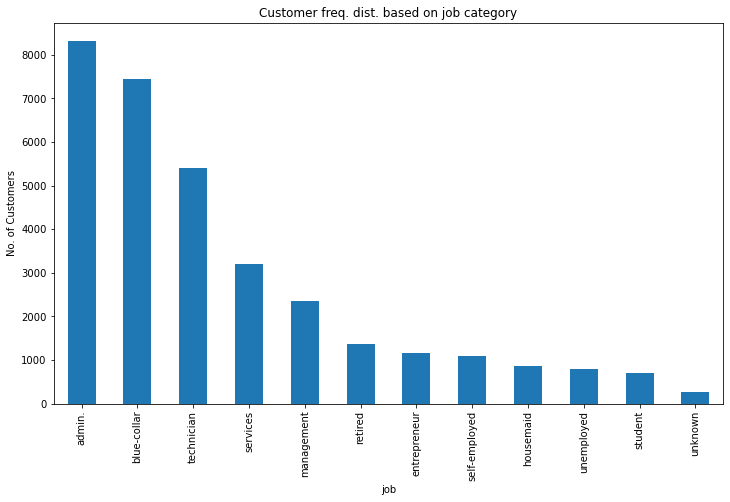

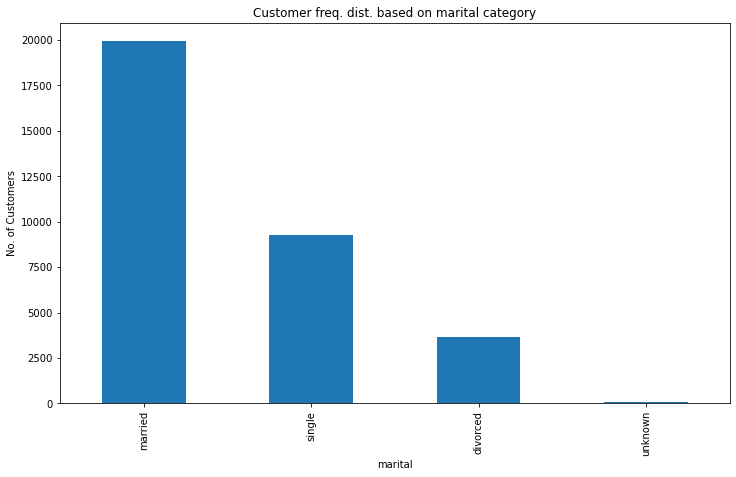

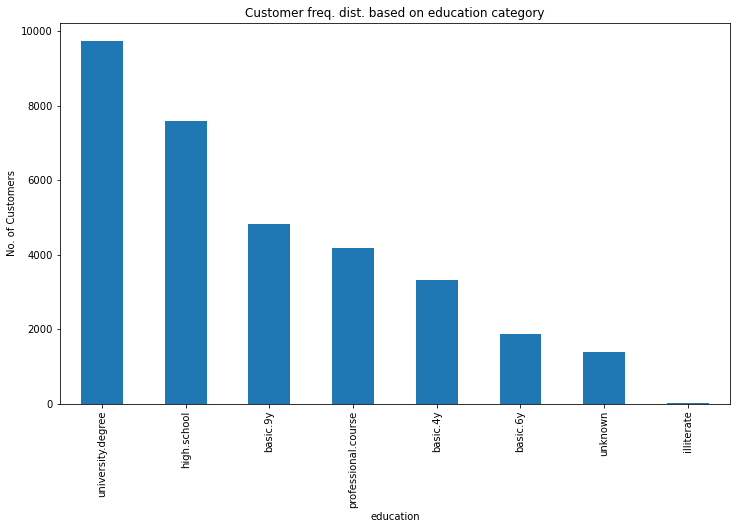

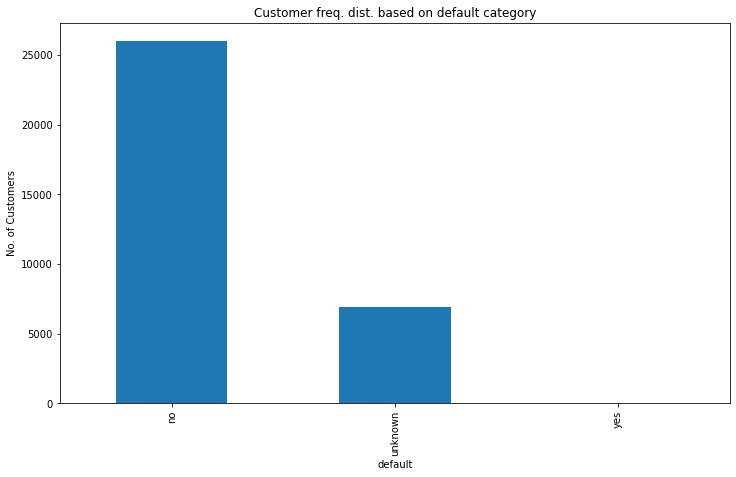

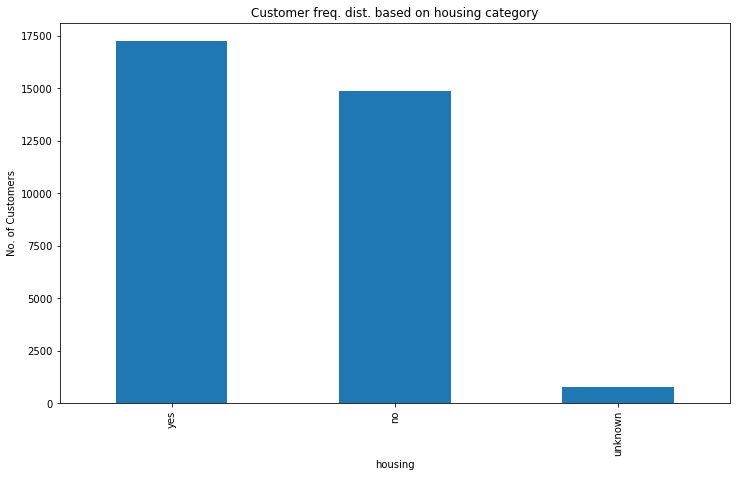

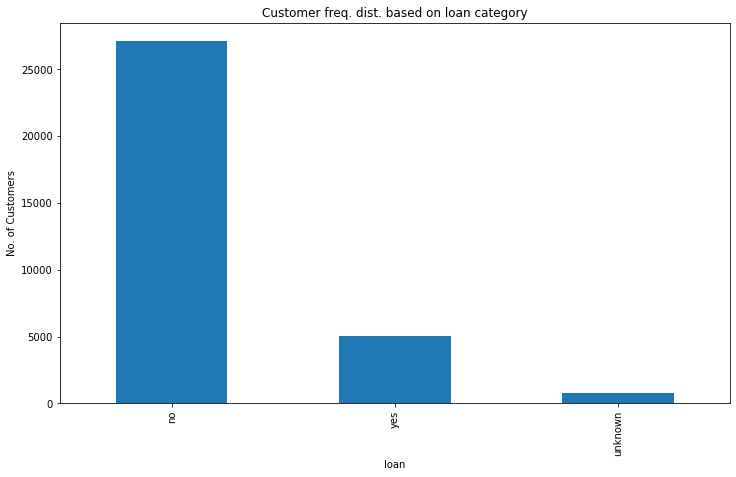

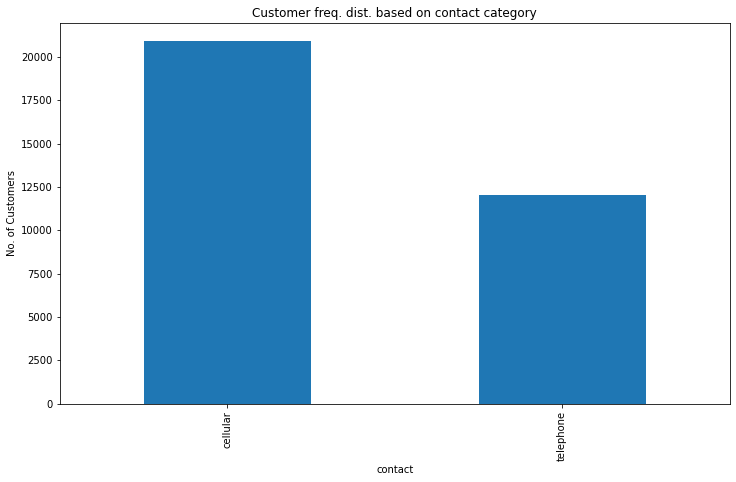

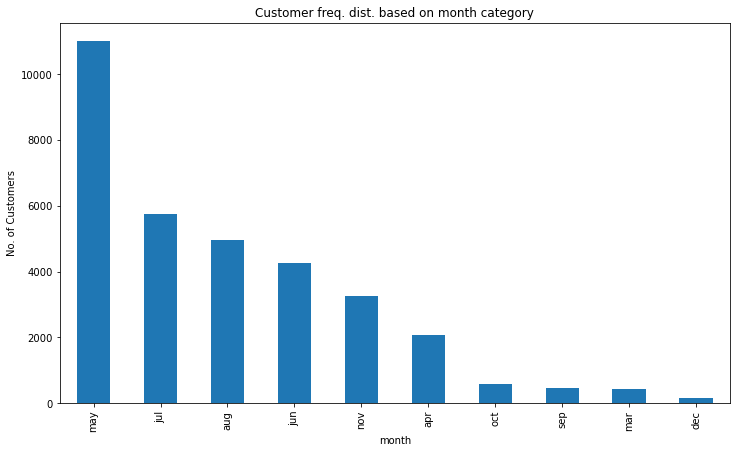

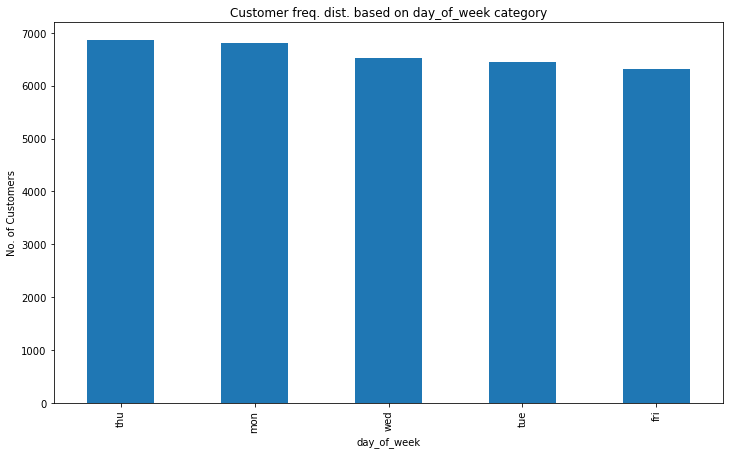

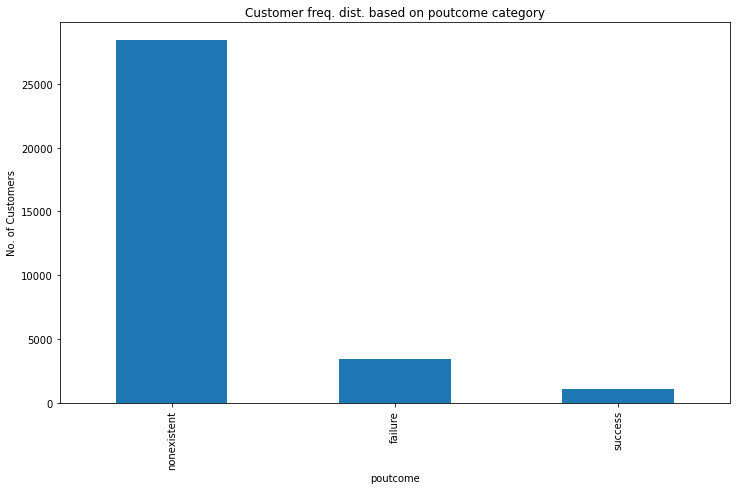

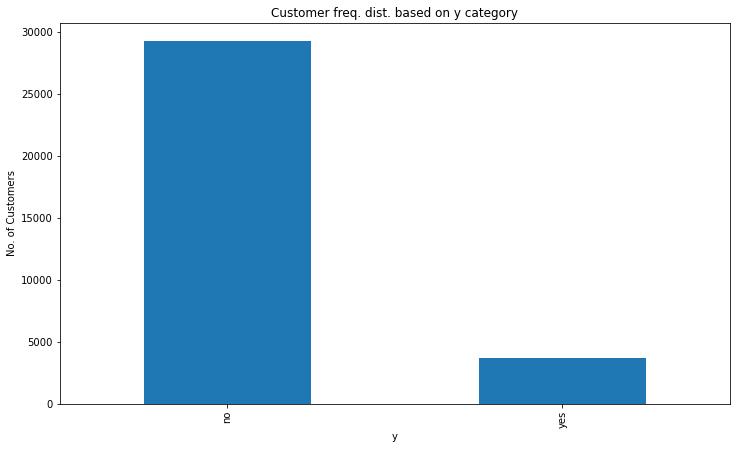

In [11]:
for column in cat_var:
    plt.figure(figsize=(12,7))
    df[column].value_counts().plot.bar()
    plt.xlabel(column)
    plt.ylabel('No. of Customers')
    plt.title(f'Customer freq. dist. based on {column} category')
    plt.show()

'unknown' instead of missing value

In [12]:
for column in cat_var:
    df[column] = df[column].replace('unknown', np.nan)

In [13]:
missing_value_perc = (df.isna().sum() / len(df)).sort_values(ascending = False)
missing_value_perc

default        0.210643
education      0.042378
housing        0.024164
loan           0.024164
job            0.008044
marital        0.001973
age            0.000000
contact        0.000000
month          0.000000
day_of_week    0.000000
duration       0.000000
campaign       0.000000
pdays          0.000000
previous       0.000000
poutcome       0.000000
y              0.000000
dtype: float64

In [14]:
for column in cat_var:
    mode = df[column].mode()[0]
    df[column] = df[column].replace(np.nan, mode)

In [15]:
df_num = df.select_dtypes(include=[np.number])
df_num.head()

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0


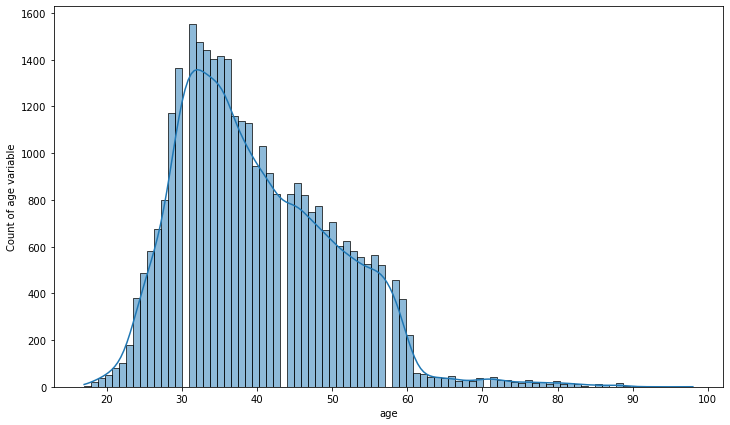

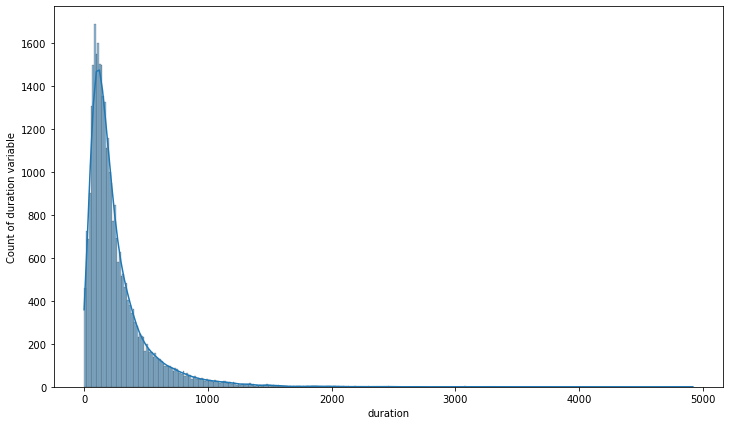

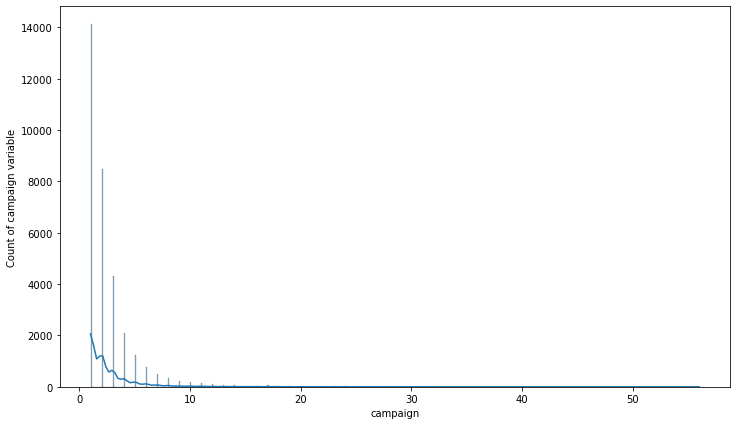

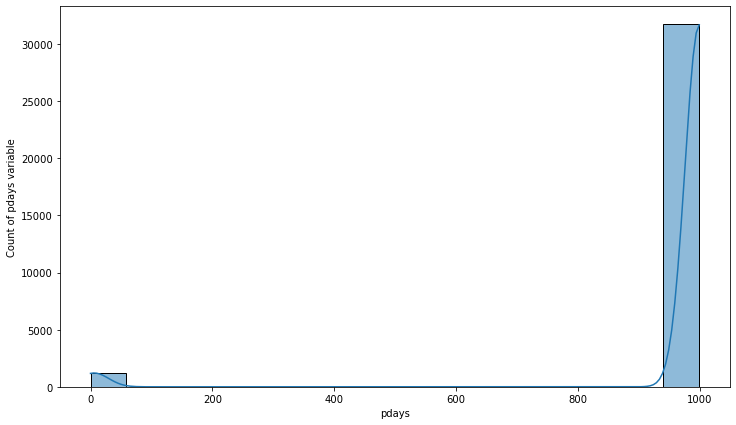

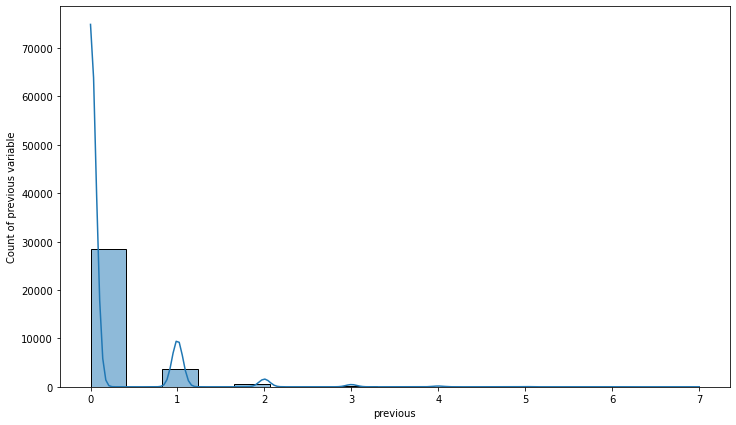

In [16]:
for column in ['age','duration','campaign','pdays','previous']:
    plt.figure(figsize=(12,7))
    sns.histplot(df[column],kde=True)
    plt.xlabel(column)
    plt.ylabel(f'Count of {column} variable')
    plt.show()

In [17]:
df.describe()

,age,duration,campaign,pdays,previous
count,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000
mean,40.012810,258.159614,2.560804,962.043440,0.174762
std,10.403035,258.995259,2.752579,187.973035,0.499078
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [18]:
df.drop(columns=["pdays", "previous"], axis=1, inplace=True)

Insights from histogram plots
- Histplots of age, duration and campaign are all skewed due to presence of lot of outliers
- Count of previous contacts are mostly 0. Column can be removed
- Count of pdays are mostly 999 meaning never contacted before. Column can be removed

https://www.kaggle.com/code/rashmiranu/banking-dataset-eda-and-binary-classification

Bivariate analysis

Boxplot

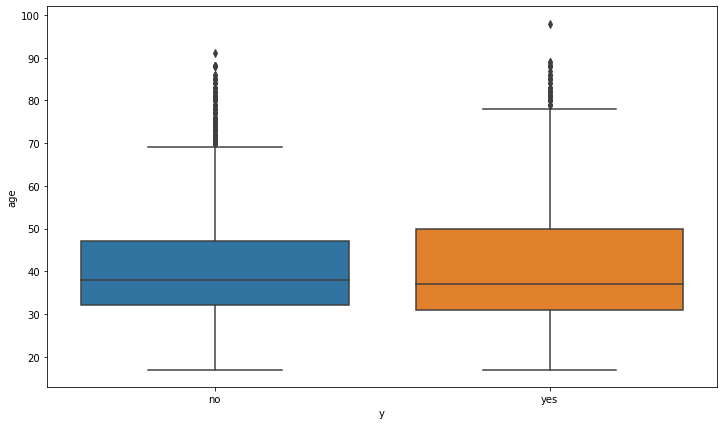

In [19]:
plt.figure(figsize=(12,7))
sns.boxplot(y='age',x='y',data= df)
plt.show()

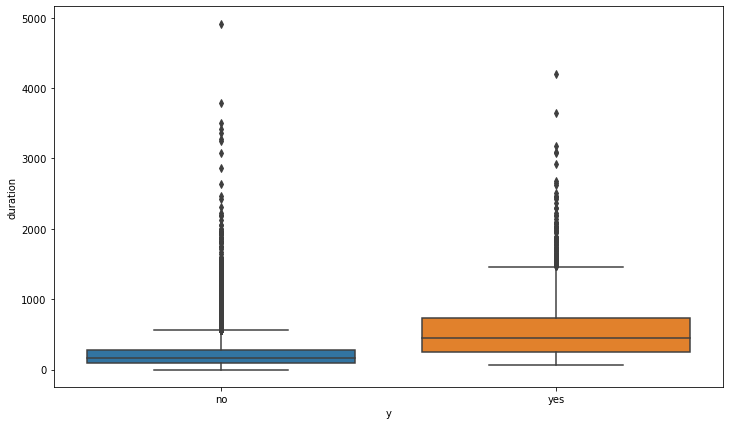

In [20]:
plt.figure(figsize=(12,7))
sns.boxplot(y='duration',x='y',data= df)
plt.show()

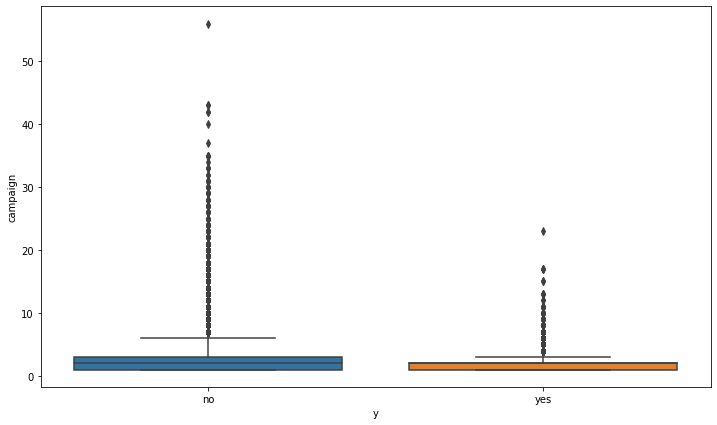

In [21]:
plt.figure(figsize=(12,7))
sns.boxplot(y='campaign',x='y',data= df)
plt.show()

Insights from boxplot
- Age distribution of customers who made an not made deposits are similar
- If the call duration is high, it implies higher chance of taking term deposit
- Campaign calls dialled to customers who made and not made deposits are similar

Bivariate analysis of categorical variables

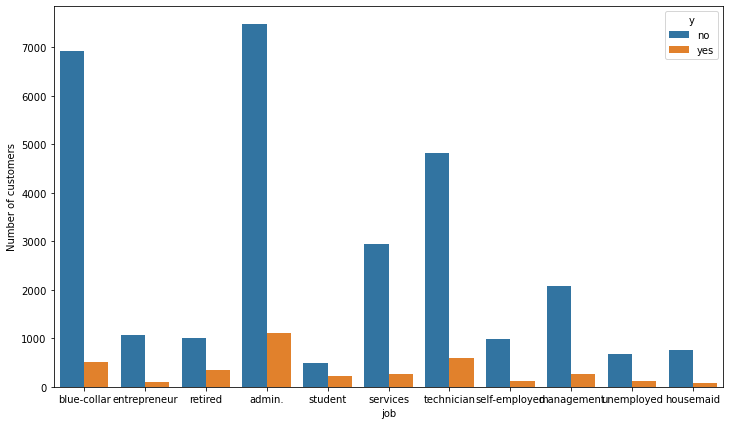

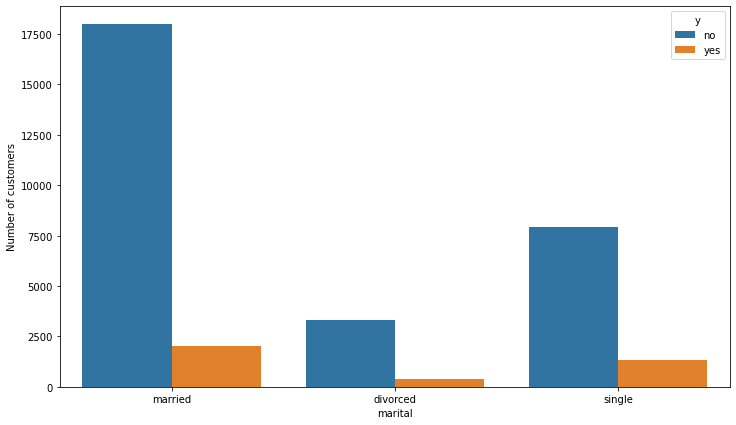

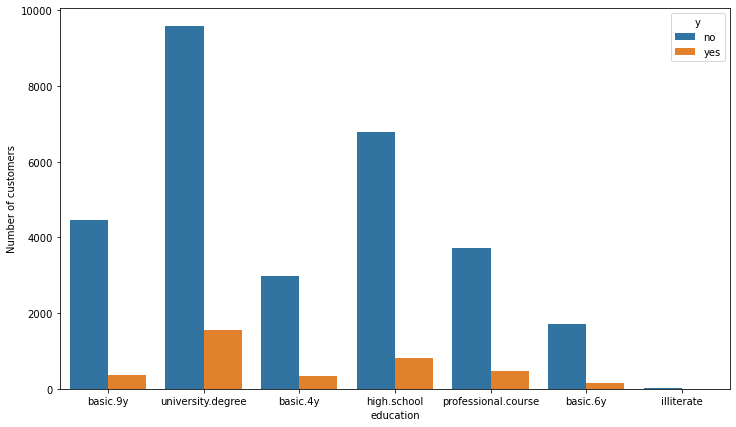

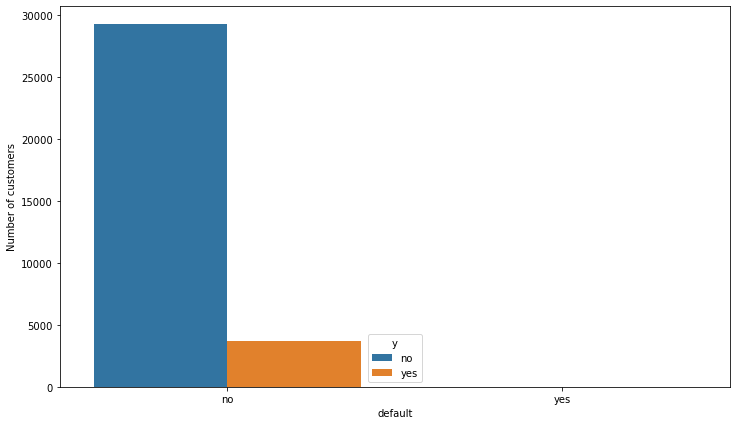

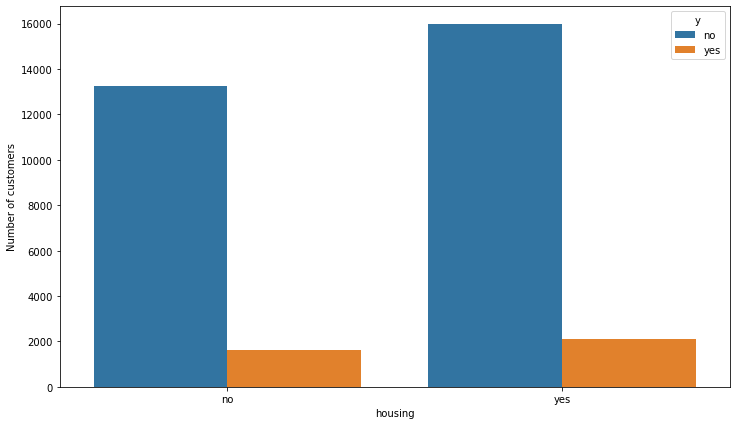

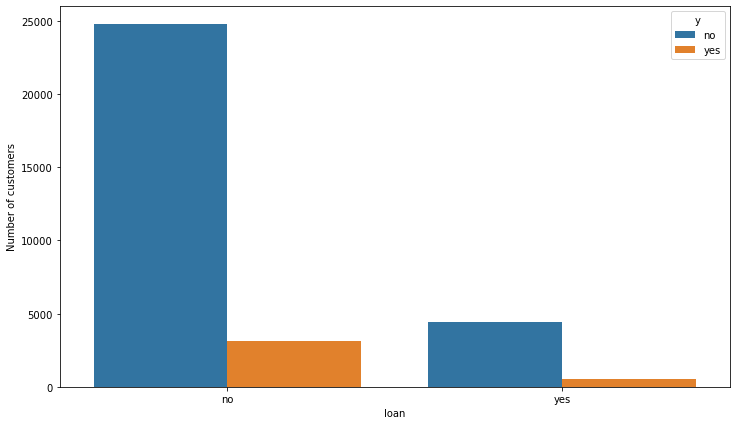

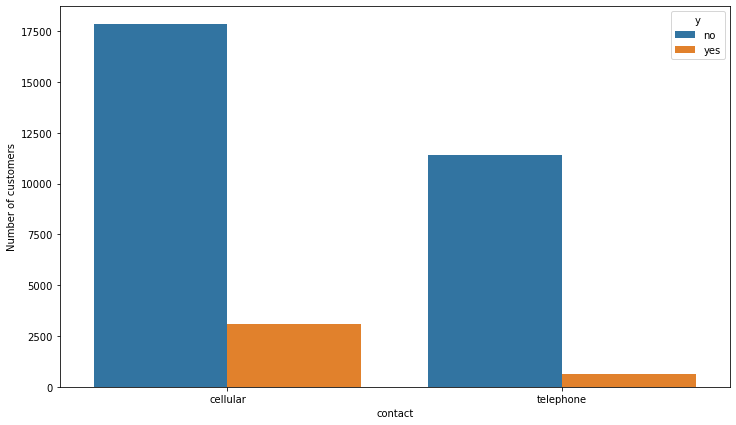

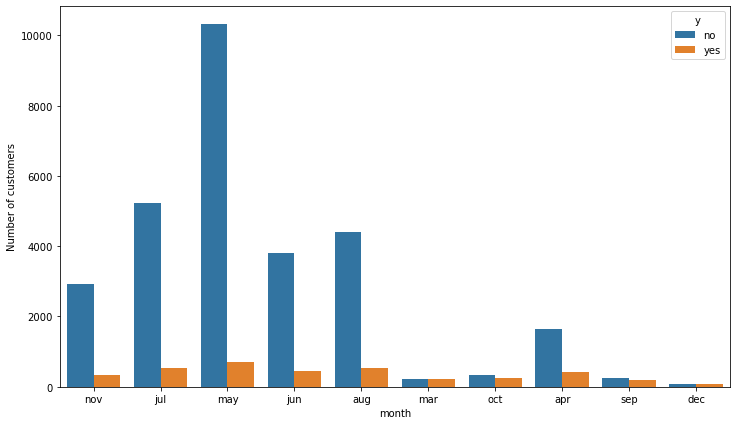

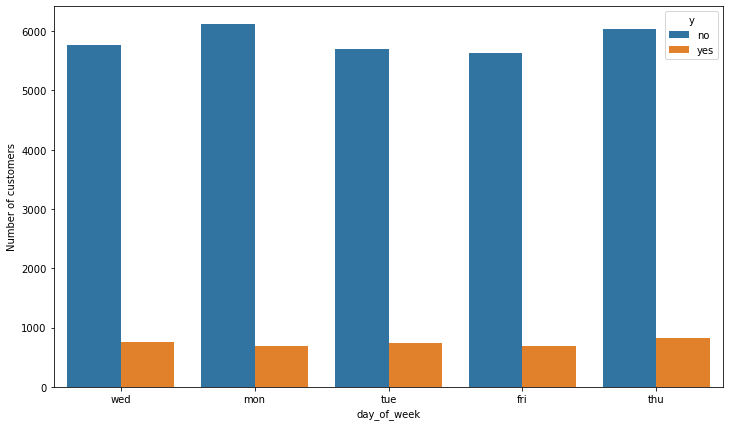

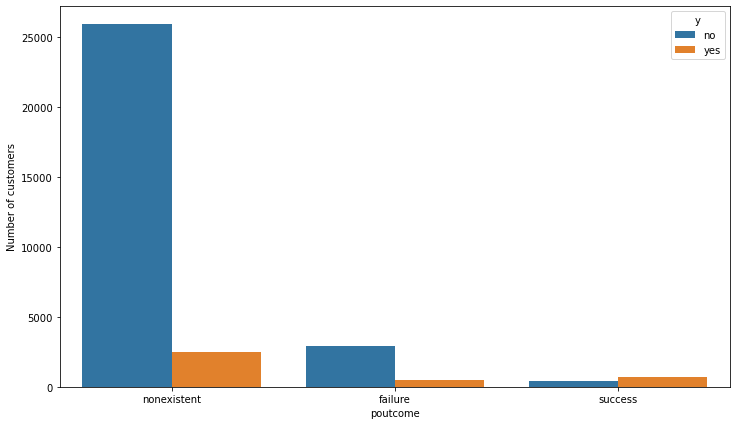

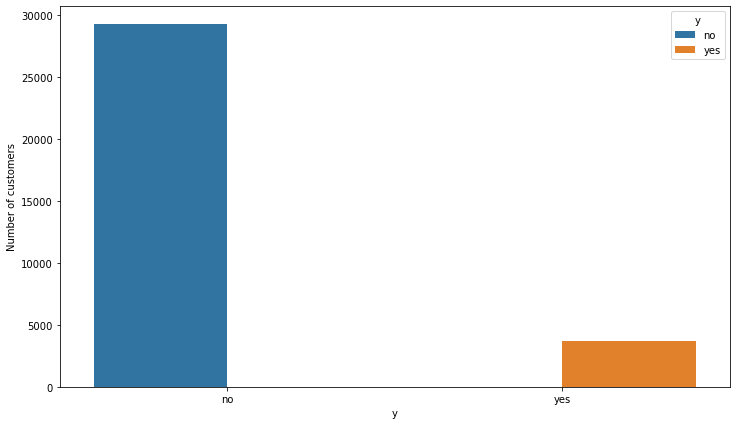

In [22]:
for column in cat_var:
    plt.figure(figsize=(12,7))
    sns.countplot(df[column], hue = df['y'])
    plt.xlabel(column)
    plt.ylabel('Number of customers')
    plt.show()

Pairplots

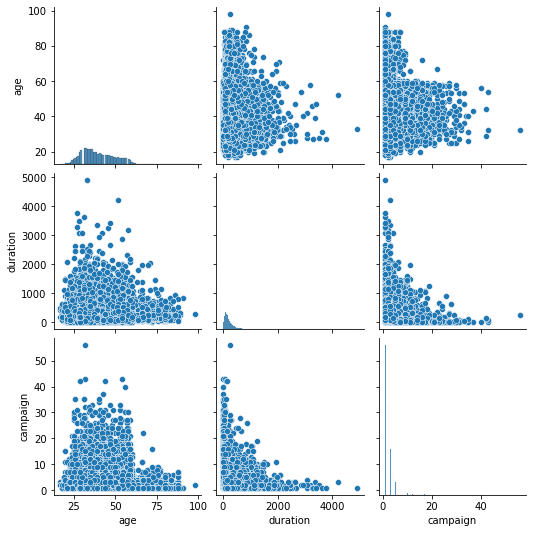

In [23]:
sns.pairplot(data = df, vars = ['age','duration','campaign'])
plt.show()

Handling Outliers

age, duration and campaign are skewed right. We replace outliers with lower and upper boundaries. Outliers cause serious impact to mean and variance and hence is necessary to treat them.

In [24]:
lower_boundary = []
upper_boundary = []

for column in ['age', 'duration', 'campaign']:
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_bound = df[column].quantile(0.25) - 1.5*IQR
    upper_bound = df[column].quantile(0.75) + 1.5*IQR
    
    lower_boundary.append(lower_bound)
    upper_boundary.append(upper_bound)

Replacing outliers which are beyond upper boundary in this problem as there are no outliers below lower boundary

In [25]:
j = 0
for column in ["age", "duration", "campaign"]:
    df.loc[df[column] > upper_boundary[j], column] = int(upper_boundary[j])
    j += 1

In [26]:
df.describe()

,age,duration,campaign
count,32942.000000,32942.000000,32942.000000
mean,39.928632,234.950428,2.271204
std,10.118048,176.862156,1.546376
min,17.000000,0.000000,1.000000
25%,32.000000,103.000000,1.000000
50%,38.000000,180.000000,2.000000
75%,47.000000,319.000000,3.000000
max,69.000000,643.000000,6.000000


Changes are not that high

Encoding Categorical variables

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()

In [29]:
df['y'] = le.fit_transform(df['y'])

In [30]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
poutcome       object
y               int64
dtype: object

In [31]:
cat_var = df.select_dtypes(include = ['object']).columns
cat_var

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

One Hot Encoding for the rest of categorical variables

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [74]:
#one_hot_encoder = OneHotEncoder(sparse = False, drop = 'first', handle_unknown = 'ignore')
one_hot_encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [75]:
df_ohe = pd.DataFrame(one_hot_encoder.fit_transform(df[cat_var]), columns=one_hot_encoder.get_feature_names(), 
                      index = df.index)
df_ohe

,x0_admin.,x0_blue-collar,x0_entrepreneur,x0_housemaid,x0_management,x0_retired,x0_self-employed,x0_services,x0_student,x0_technician,...,x7_oct,x7_sep,x8_fri,x8_mon,x8_thu,x8_tue,x8_wed,x9_failure,x9_nonexistent,x9_success
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32947,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
32948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
df_ohe = df_ohe.astype('int')
df_ohe

,x0_admin.,x0_blue-collar,x0_entrepreneur,x0_housemaid,x0_management,x0_retired,x0_self-employed,x0_services,x0_student,x0_technician,...,x7_oct,x7_sep,x8_fri,x8_mon,x8_thu,x8_tue,x8_wed,x9_failure,x9_nonexistent,x9_success
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
32946,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
32947,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
32948,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [77]:
df_ohe.columns

Index(['x0_admin.', 'x0_blue-collar', 'x0_entrepreneur', 'x0_housemaid',
       'x0_management', 'x0_retired', 'x0_self-employed', 'x0_services',
       'x0_student', 'x0_technician', 'x0_unemployed', 'x1_divorced',
       'x1_married', 'x1_single', 'x2_basic.4y', 'x2_basic.6y', 'x2_basic.9y',
       'x2_high.school', 'x2_illiterate', 'x2_professional.course',
       'x2_university.degree', 'x3_no', 'x3_yes', 'x4_no', 'x4_yes', 'x5_no',
       'x5_yes', 'x6_cellular', 'x6_telephone', 'x7_apr', 'x7_aug', 'x7_dec',
       'x7_jul', 'x7_jun', 'x7_mar', 'x7_may', 'x7_nov', 'x7_oct', 'x7_sep',
       'x8_fri', 'x8_mon', 'x8_thu', 'x8_tue', 'x8_wed', 'x9_failure',
       'x9_nonexistent', 'x9_success'],
      dtype='object')

In [78]:
num_var = df.select_dtypes(include = ['int']).columns
num_var

Index(['age', 'duration', 'campaign', 'y'], dtype='object')

In [79]:
df_num = df[num_var]
df_num

,age,duration,campaign,y
0,49,227,4,0
1,37,202,2,0
2,69,643,1,1
3,36,120,2,0
4,59,368,2,0
...,...,...,...,...
32945,28,192,1,0
32946,52,64,1,0
32947,54,131,4,0
32948,29,165,1,0


In [80]:
df_new = pd.concat([df_ohe,df_num], axis=1).reset_index(drop=True)
df_new

,x0_admin.,x0_blue-collar,x0_entrepreneur,x0_housemaid,x0_management,x0_retired,x0_self-employed,x0_services,x0_student,x0_technician,...,x8_thu,x8_tue,x8_wed,x9_failure,x9_nonexistent,x9_success,age,duration,campaign,y
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,49,227,4,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,37,202,2,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,69,643,1,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,36,120,2,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,59,368,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32937,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,28,192,1,0
32938,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,52,64,1,0
32939,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,54,131,4,0
32940,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,29,165,1,0


In [7]:
import statsmodels.api as sm
import scipy.stats as stats

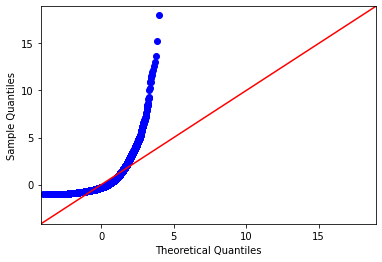

In [10]:
sm.qqplot(df['duration'], line = '45', fit = True, dist = stats.norm)
plt.show()